### 가설2 - 뇌졸중 발병 요인에 성별, 나이, 고혈압, BMI는 음의 상관관계가 있을 것이다.

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
import koreanize_matplotlib
import pingouin as pg
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

In [32]:
# 데이터 불러오기
url = "https://raw.githubusercontent.com/moksu27/midproject/main/healthcare-dataset-stroke-data.csv"
df = pd.read_csv(url)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [33]:
# 성별 "Other" 행 제거 및 인덱스 리셋
df = df.drop(index = 3116)
df = df.reset_index()
# 인덱스 칼럼 제거
df = df.drop(columns = "index")

In [34]:
age_list=[]
for age in df["age"]:
    if age >= 0 and age <10:
        age_list.append("10대 이전")
    elif age >= 10 and age <20:
        age_list.append("10대")
    elif age >= 20 and age <30:
        age_list.append("20대")
    elif age >= 30 and age <40:
        age_list.append("30대")
    elif age >= 40 and age <50:
        age_list.append("40대")
    elif age >= 50 and age <60:
        age_list.append("50대")
    elif age >= 60 and age <70:
        age_list.append("60대")
    elif age >= 70 and age <80:
        age_list.append("70대")
    elif age >= 80 and age <90:
        age_list.append("80대")
    
df["age_group"] = age_list

In [35]:
df= df.sort_values(by = "age")

In [20]:
# 중복값 확인
df.duplicated().value_counts()

False    5109
dtype: int64

In [21]:
#결측치 확인
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
age_group              0
dtype: int64

In [37]:
gender_list = []
for i in df["gender"]:
    if i == "Male":
        gender_list.append(0)
    elif i == "Female":
        gender_list.append(1)
df["gender_number"] = gender_list

In [38]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,gender_number
1614,47350,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0,10대 이전,1
3294,29955,Male,0.08,0,0,No,children,Rural,70.33,16.9,Unknown,0,10대 이전,0
3967,41500,Male,0.16,0,0,No,children,Rural,69.79,13.0,Unknown,0,10대 이전,0
3617,22877,Male,0.16,0,0,No,children,Urban,114.71,17.4,Unknown,0,10대 이전,0
4020,8247,Male,0.16,0,0,No,children,Urban,109.52,13.9,Unknown,0,10대 이전,0


## 상관계수 구하기

In [42]:
df_sample = df[["stroke", "age", "age_group", "gender", "gender_number", "bmi", "hypertension"]]
df_sample.head()

,stroke,age,age_group,gender,gender_number,bmi,hypertension
1614,0,0.08,10대 이전,Female,1,14.1,0
3294,0,0.08,10대 이전,Male,0,16.9,0
3967,0,0.16,10대 이전,Male,0,13.0,0
3617,0,0.16,10대 이전,Male,0,17.4,0
4020,0,0.16,10대 이전,Male,0,13.9,0


/var/folders/k5/knpgq_1j4xg_p46vnk55j0gm0000gn/T/ipykernel_79115/2168887879.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_sample.corr(method = 'pearson')


<AxesSubplot: >

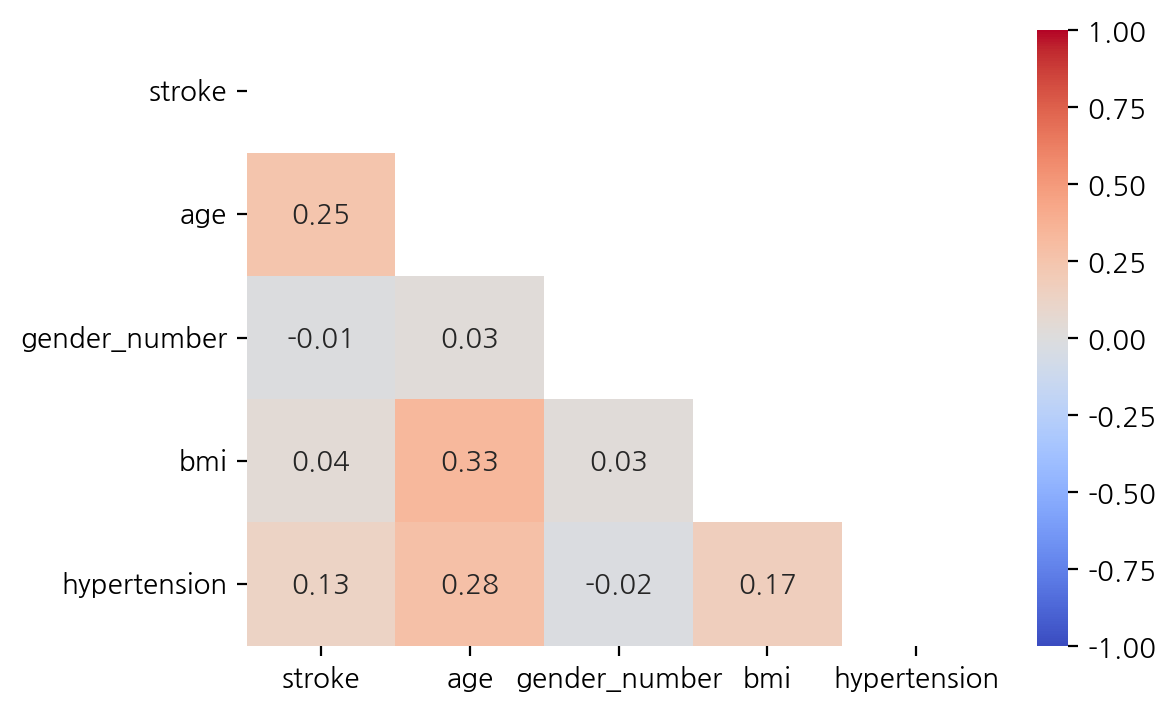

In [44]:
corr = df_sample.corr(method = 'pearson')
mask = np.triu(np.ones_like(corr))
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot = True, fmt = ".2f",vmin = -1, vmax = 1, cmap ="coolwarm", mask = mask)

In [24]:
# 변수 별 상관계수 (age - stroke)
pg.corr(df.stroke,df.age)

,n,r,CI95%,p-val,BF10,power
pearson,5109,0.245239,"[0.22, 0.27]",7.435469e-71,1.006e+67,1.0


In [25]:
# 변수 별 상관계수 (bmi - stroke)
df_bmi = df[["stroke","bmi"]]
df_bmi.dropna()
pg.corr(df_bmi.stroke,df_bmi.bmi)

,n,r,CI95%,p-val,BF10,power
pearson,4908,0.042341,"[0.01, 0.07]",0.003008,1.457,0.84315


In [26]:
# 변수 별 상관계수 (age - gender)
gender_list = []
for i in df["gender"]:
    if i == "Male":
        gender_list.append(0)
    elif i == "Female":
        gender_list.append(1)
df["gender_number"] = gender_list

In [27]:
pg.corr(df.stroke,df.gender_number)

,n,r,CI95%,p-val,BF10,power
pearson,5109,-0.009081,"[-0.04, 0.02]",0.516396,0.022,0.099463


In [28]:
# 변수 별 상관계수 (age - hypertension)
pg.corr(df.stroke,df.hypertension)

,n,r,CI95%,p-val,BF10,power
pearson,5109,0.127891,"[0.1, 0.15]",4.441473e-20,3.351e+16,1.0
